<a href="https://colab.research.google.com/github/Untick/NetOptik/blob/Polyakov-Alexander-branch/Polyakov%20Alexander/Glasses_arm_tag_v0_1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Установка зависимостей

In [2]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/107.7 GB disk)


In [3]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 8 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 0s (25.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debcon

In [4]:
from google.colab import drive
import cv2
from matplotlib import pyplot as plt
from ultralytics import YOLO
from PIL import Image
import os
import numpy as np
import pytesseract
import pandas as pd

In [5]:
PATH_DATA = '/content/drive/MyDrive/AI/datasets/glasses_arm_tags/'
PATH_DATA_YAML = PATH_DATA + 'data.yaml'

# Монтируем Google Диск
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!ls $PATH_DATA

data.yaml  runs  test  train  valid  yolov8n.pt


In [7]:
%cd $PATH_DATA

/content/drive/MyDrive/AI/datasets/glasses_arm_tags


In [8]:
!cat $PATH_DATA_YAML

train: ../train/images
val: ../valid/images

names:
  0: arm_tag


## Utils

In [9]:
def resize_image_for_predict(file, IMG_W = 480, IMG_H=640):
  # Read the image uses OpenCV
  img = cv2.imread(file)

  # Resize the image
  resized_img = cv2.resize(img, (IMG_W, IMG_H))
  return cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB)

In [10]:
def apply_bboxes_on_image(img, boxes):
  fig, ax = plt.subplots(1)
  ax.imshow(img)

  for box in boxes:
    x_min, y_min, x_max, y_max = box[:4]
    rect = plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, fill=False, edgecolor='red', linewidth=2)
    ax.add_patch(rect)

  plt.axis('off')
  plt.show()

In [11]:
def crop_image_using_bboxes(image, boxes):
    cropped_images = []

    for box in boxes:
        x_min, y_min, x_max, y_max = box[:4]
        cropped_image = image[int(y_min):int(y_max), int(x_min):int(x_max)]
        cropped_images.append(cropped_image)

    return cropped_images

In [12]:
def display_image(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show()

## Train

In [16]:
# Load a model
model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)
model.train(data=PATH_DATA_YAML, epochs=50, nms=True)
model.val()

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/AI/datasets/glasses_arm_tags/data.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e8d38e838b0>
fitness: 0.7534659140300752
keys: ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']
maps: array([    0.73214])
names: {0: 'arm_tag'}
plot: True
results_dict: {'metrics/precision(B)': 1.0, 'metrics/recall(B)': 0.9316791055797199, 'metrics/mAP50(B)': 0.9454249893752658, 'metrics/mAP50-95(B)': 0.7321371278806097, 'fitness': 0.7534659140300752}
save_dir: PosixPath('runs/detect/val5')
speed: {'preprocess': 1.9944310188293457, 'inference': 175.2030849456787, 'loss': 0.0002980232238769531, 'postprocess': 2.303028106689453}

## Model info

In [17]:
MODEL_PATH = '/content/drive/MyDrive/AI/datasets/glasses_arm_tags/runs/detect/train3/weights/best.pt'
model = YOLO(MODEL_PATH)  # Load the custom model

# Validate the model
metrics = model.val()
print('map50-95', metrics.box.map)
print('map50', metrics.box.map50)
print('map75', metrics.box.map75)

Ultralytics YOLOv8.0.143 🚀 Python-3.10.6 torch-2.0.1+cu118 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients
val: Scanning /content/drive/MyDrive/AI/datasets/glasses_arm_tags/valid/labels.cache... 20 images, 0 backgrounds, 0 corrupt: 100%|██████████| 20/20 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:08<00:00,  4.38s/it]
                   all         20         20          1      0.932      0.945      0.732
Speed: 2.7ms preprocess, 400.3ms inference, 0.0ms loss, 10.1ms postprocess per image
Results saved to runs/detect/val6


map50-95 0.7321371278806097
map50 0.9454249893752658
map75 0.8841233140283139


| Эпохи | map50-95         | map50              | map75              |
|-------|------------------|--------------------|--------------------|
| 10    | 0.542909035764   | 0.947751937984     | 0.613733260563     |
| 30    | 0.673374604814   | 0.986666666667     | 0.853572767695     |
| 50    | 0.732137127881   | 0.945424989375     | 0.884123314028     |


## Detect tags


0: 640x480 1 arm_tag, 147.4ms
Speed: 2.9ms preprocess, 147.4ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)


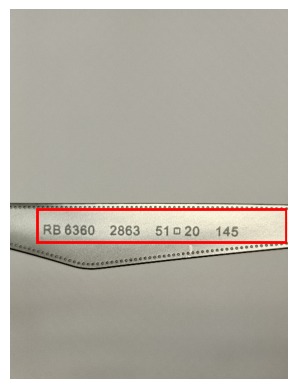

In [27]:
TEST_FILE = '/content/drive/MyDrive/AI/datasets/glasses_arm_tags/test/10.jpg'

# Load model
predict_model = YOLO(MODEL_PATH)

# Load image

resized_img = resize_image_for_predict(TEST_FILE)

# Predict
# results = predict_model.predict(resized_img, iou=0.1)
results = predict_model.predict(resized_img, max_det=1)


# Write result
apply_bboxes_on_image(resized_img, results[0].boxes.data)

## Crop images

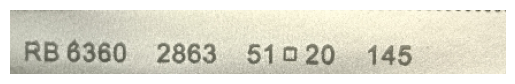

In [28]:
imgs = crop_image_using_bboxes(resized_img, results[0].boxes.data)

for img in imgs:
  display_image(img)

## Read text from image

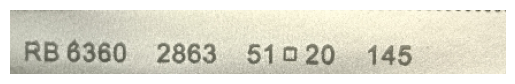

-RB6360 2863 51020 145

 



In [29]:
# Reat text uses pytesseract
extracted_text = pytesseract.image_to_string(imgs[0])

display_image(imgs[0])
print(extracted_text)

## Таблица аттрибутов

In [56]:
GID = 513939123
KEY = '1uT-ljE2M4dWYPygo2W80ayUMvGRDv6kf'

spreadsheet_url = f"https://docs.google.com/spreadsheets/d/{KEY}/export?format=csv&gid={GID}"

# Read the Google Spreadsheet data into the pandas DataFrame
df = pd.read_csv(spreadsheet_url)

# Clean empty data
df = df.drop(df.columns[[0, 1]], axis=1)
df.dropna(subset=[df.columns[1]], inplace=True)

# Display the DataFrame
df

,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,RB 4246V 5240 47*19 140,RB 4246V 5240,47.0,19.0,140.0,113.0
1,RB 5353 5628 50*19 145,RB 5353 5628,50.0,19.0,145.0,119.0
2,RB 3747V 2500 47*21 140,RB 3747V 2500,47.0,21.0,140.0,115.0
3,RB 7084 5635 54*18 140,RB 7084 5635,54.0,18.0,140.0,126.0
4,RB 7086 2000 51*18 140,RB 7086 2000,51.0,18.0,140.0,120.0
...,...,...,...,...,...,...
214,FPVN002 LIL 44*15 120,FPVN002 LIL,44.0,15.0,120.0,103.0
215,FPVN002 VLT 44*15 120,FPVN002 VLT,44.0,15.0,120.0,103.0
216,FPVN003 CHR 46*14 120,FPVN003 CHR,46.0,14.0,120.0,106.0
217,FPVN003 BLUE 46*14 120,FPVN003 BLUE,46.0,14.0,120.0,106.0


In [63]:
import re

def clean_text(text):
    return re.sub(r'[^a-zA-Z0-9]', '', text)

target_substring = clean_text(extracted_text[:12])
escaped_target_substring = re.escape(target_substring)

print('Search string:', escaped_target_substring)

# Clean the DataFrame column
df['CleanedTag'] = df['Unnamed: 2'].apply(clean_text)
result_df = df[df['CleanedTag'].str.contains(escaped_target_substring, case=False, regex=True)]

# Display the results
result_df

Search string: RB63602863


,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,CleanedTag
9,RB 6360 2863 51*20 145,RB 6320 2863,51.0,20.0,145.0,122.0,RB636028635120145


## Выводы

Погрешности:

1.   Модель Yolo может ложно найти несколько меток на изображении.
2.   tesseract не верно интерпретирует символы например **квадрат** как **0** или цифру **5** как **6**
